In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('sentiment.csv',encoding= 'unicode_escape')


In [ ]:
## Data Exploration

In [6]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²)  
0   

In [7]:
# Get general information about the dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB
None


In [8]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Population -2020  Land Area (Km²)  Density (P/Km²)
count      3.534000e+03     3.534000e+03      3534.000000
mean       3.941891e+07     6.722499e+05       348.894171
std        1.468757e+08     1.839134e+06      1967.012367
min        8.010000e+02     0.000000e+00         2.000000
25%        1.968001e+06     2.281000e+04        35.000000
50%        8.696453e+06     1.127600e+05        87.000000
75%        2.843594e+07     5.279700e+05       214.000000
max        1.439324e+09     1.637687e+07     26337.000000


In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64


In [10]:

# Unique values in the 'sentiment' column
print("\nUnique Sentiment Labels:")
print(df['sentiment'].unique())


Unique Sentiment Labels:
['neutral' 'positive' 'negative' nan]


In [11]:
# Count of each sentiment label
print("\nSentiment Label Counts:")
print(df['sentiment'].value_counts())


Sentiment Label Counts:
sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

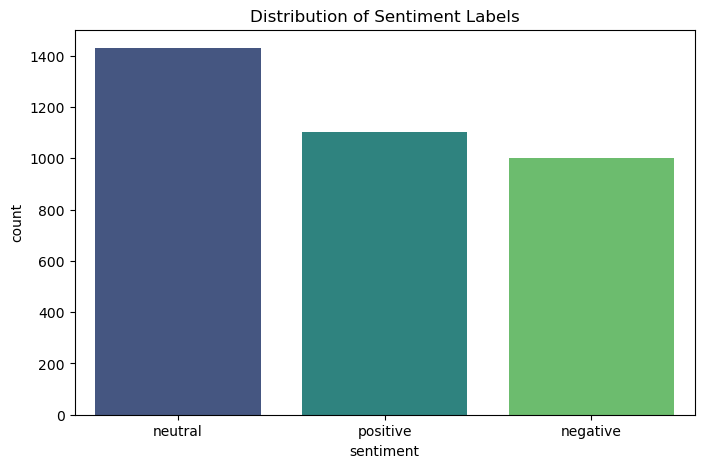

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.show()

In [14]:
## Data Preprocessing

In [21]:
pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/90/f0/0133b684e18932c7bf4075d94819746cee2c0329f2569db526b0fa1df1df/spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd044e6f62a3d317c461f6f0c153c6573ed13025752d779e514000c15dd2/cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.2 from https://files.pythonhosted.org/packages/e4/fc/78cdbdb79f5

In [22]:
import re
import string
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

In [28]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB 1.3 MB/s eta 0:00:10
     ---------------------------------------- 0.1/12.8 MB 1.1 MB/s eta 0:00:13
     ---------------------------------------- 0.1/12.8 MB 1.1 MB/s eta 0:00:12
     ---------------------------------------- 0.2/12.8 MB 1.0 MB/s eta 0:00:13
     ---------------------------------------- 0.2/12.8 MB 1.0 MB/s eta 0:00:13
      -------------------------------------- 0.2/12.8 MB 692.9 kB/s eta 0:00:19
      -------------------------------------- 0.2/12.8 MB 621.6 kB/s eta 0:00:21
      -------------------------------------- 0.2/12.8 MB 625.1 kB/s eta 0:00:21
      -------------------------------------- 0.2/12.8 MB 600.7 kB/s eta 0:00:21
      -------------------------------------- 0.3/12.8 MB 582.4 kB/s eta 0:00:22
      -------------------------------------- 0.3/12.8 MB 582.

In [58]:
nlp = spacy.load("en_core_web_sm")

In [64]:
# Define a function for text preprocessing
def preprocess_text(text):
     # Check if the text is not NaN
    if pd.notna(text):
    # Convert to lowercase
      text = str(text).lower()
 # Remove special characters, numbers, and punctuation
    text = re.sub(r'\d+', '', text) if isinstance(text, str) else ''
    text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenization using NLTK
    tokens = word_tokenize(text)
     # Remove stopwords using NLTK
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization using spaCy
    doc = nlp(" ".join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    # Join tokens back into a string
    preprocessed_text = " ".join(lemmatized_tokens)
    return preprocessed_text
# Apply text preprocessing to the 'text' column
df['preprocessed_text'] = df['text'].apply(preprocess_text)



In [65]:
# Apply text preprocessing to the 'text' column
df['preprocessed_text'] = df['text'].apply(preprocess_text)


In [66]:
# Display the preprocessed text
print("Preprocessed Text:")
print(df['preprocessed_text'].head())

Preprocessed Text:
0                   last session day httptwitpiccomezh
1    shanghai also really exciting precisely skyscr...
2    recession hit veronique branquinho quit compan...
3                                           happy bday
4                                httptwitpiccomwp like
Name: preprocessed_text, dtype: object


In [67]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),preprocessed_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,last session day httptwitpiccomezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,shanghai also really exciting precisely skyscr...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,recession hit veronique branquinho quit compan...
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,happy bday
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,httptwitpiccomwp like


In [ ]:
##EDA

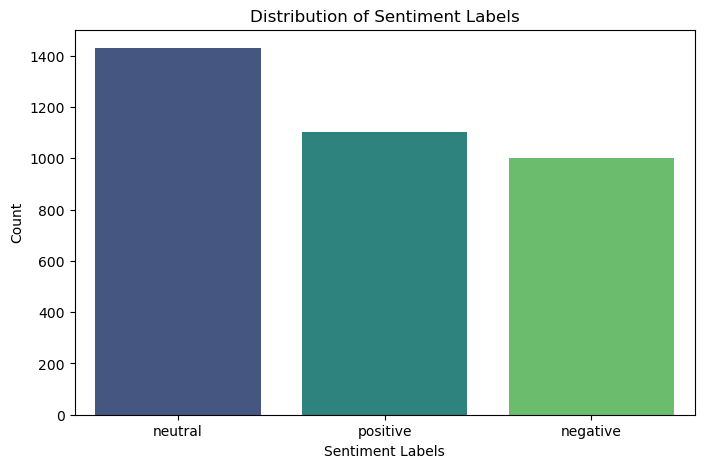

In [68]:
# Visualize the distribution of sentiment labels using a histogram
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.show()

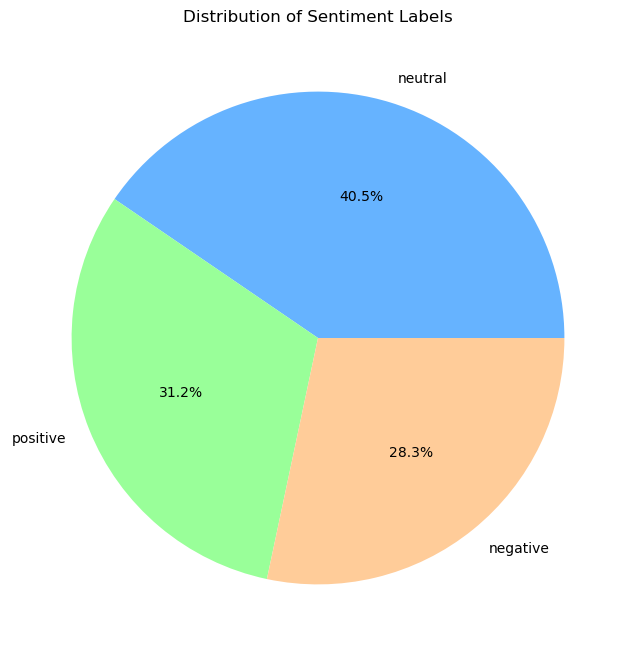

In [69]:
# Visualize the distribution of sentiment labels using a pie chart
plt.figure(figsize=(8, 8))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Sentiment Labels')
plt.ylabel('')
plt.show()

In [75]:
##Text Vectorization

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

In [72]:
# Apply TF-IDF vectorization to the preprocessed text
tfidf_vectors = tfidf_vectorizer.fit_transform(df['preprocessed_text'])

In [73]:
# Convert the TF-IDF vectors to a DataFrame for further analysis
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [74]:
# Display the TF-IDF DataFrame
print("TF-IDF Vectors:")
print(tfidf_df.head())

TF-IDF Vectors:
   aaaaa  aaaaaaaa  aaaaahhhh  aaass  aaaww  aah  aarg  aaron  aasahan  \
0    0.0       0.0        0.0    0.0    0.0  0.0   0.0    0.0      0.0   
1    0.0       0.0        0.0    0.0    0.0  0.0   0.0    0.0      0.0   
2    0.0       0.0        0.0    0.0    0.0  0.0   0.0    0.0      0.0   
3    0.0       0.0        0.0    0.0    0.0  0.0   0.0    0.0      0.0   
4    0.0       0.0        0.0    0.0    0.0  0.0   0.0    0.0      0.0   

   abandon  ...  zsnagy   â½  â½al  â½eachbut  â½m  â½n  â½nbye  â½s  â½t  \
0      0.0  ...     0.0  0.0   0.0        0.0  0.0  0.0     0.0  0.0  0.0   
1      0.0  ...     0.0  0.0   0.0        0.0  0.0  0.0     0.0  0.0  0.0   
2      0.0  ...     0.0  0.0   0.0        0.0  0.0  0.0     0.0  0.0  0.0   
3      0.0  ...     0.0  0.0   0.0        0.0  0.0  0.0     0.0  0.0  0.0   
4      0.0  ...     0.0  0.0   0.0        0.0  0.0  0.0     0.0  0.0  0.0   

   â½tition  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4     

In [77]:
# Function to get word embeddings for a given text
def get_word_embeddings(text):
    doc = nlp(text)
    return np.mean([token.vector for token in doc], axis=0) if doc else np.zeros(nlp.vocab.vectors_length)

# Apply word embeddings to the preprocessed text
df['word_embeddings'] = df['preprocessed_text'].apply(get_word_embeddings)

# Convert the word embeddings to a DataFrame
word_embeddings_df = pd.DataFrame(df['word_embeddings'].tolist())


In [78]:
# Display the Word Embeddings DataFrame
print("Word Embeddings:")
print(word_embeddings_df.head())

Word Embeddings:
         0         1         2         3         4         5         6   \
0 -0.046172 -1.017580 -0.380510 -0.227148 -0.234975 -0.508704  0.445688   
1 -0.120916 -0.653416 -0.181345  0.031552  0.063328 -0.203358  0.304444   
2 -0.514513 -0.470687  0.294548  0.185263 -0.105352 -0.207955  0.398176   
3 -0.329485 -1.014570 -0.279642 -0.273139 -0.905859 -0.412465  0.179781   
4 -0.755090 -0.701684  0.430874 -0.005139 -0.170572 -0.577765  1.034027   

         7         8         9   ...        86        87        88        89  \
0  0.953471 -0.333104 -0.172675  ...  0.882613  0.179062 -0.475463  0.498875   
1  0.269680  0.448201  0.082794  ...  0.074572 -0.475813 -0.534452  0.708661   
2  0.917118  0.061451  0.038394  ... -0.223673 -0.431133 -1.040738  0.293235   
3  0.593528  0.552839 -0.423415  ...  0.601101  0.369454 -0.685045  1.956753   
4 -0.426535  0.089465 -0.743712  ...  0.040379  0.193084  0.379248  0.124146   

         90        91        92        93        94

In [96]:
from sklearn.impute import SimpleImputer
from scipy.sparse import csr_matrix

In [97]:
##MODEL SELECTION

In [98]:
##1.Naive Bayes Model

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [100]:
# Convert sparse matrix to dense array for imputation
dense_X_train = X_train.toarray()

In [101]:
# X should be the vectorized features (TF-IDF or word embeddings)
# y should be the sentiment labels

In [102]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, df['sentiment'], test_size=0.2, random_state=42)

In [109]:
# Check and handle NaN values in dense_X_train
nan_columns = [i for i, col in enumerate(dense_X_train.T) if np.isnan(col).any()]
if nan_columns:
    print("Columns with NaN values:", nan_columns)

    # If there are NaN values, impute them using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
    dense_X_train[:, nan_columns] = imputer.fit_transform(dense_X_train[:, nan_columns])

In [110]:
# Convert dense array back to sparse matrix
X_train = csr_matrix(dense_X_train)

In [113]:
# Check and handle NaN values in y_train
nan_indices = y_train.isna()

if np.any(nan_indices):
    print("Indices with NaN values in y_train:", np.where(nan_indices)[0])

    # Replace NaN values with a special label (e.g., 'unknown')
    y_train = y_train.fillna('unknown')

Indices with NaN values in y_train: [   1    2    4 ... 3837 3847 3850]


In [114]:
# Train a Naive Bayes classifier
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [115]:
# Make predictions on the test set
naive_bayes_preds = naive_bayes_model.predict(X_test)

In [132]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric values using LabelEncoder
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_test)

In [127]:
# Check the lengths of the arrays
print("Length of y_train_numeric:", len(y_train_numeric))
print("Length of naive_bayes_preds:", len(naive_bayes_preds))

Length of y_train_numeric: 3852
Length of naive_bayes_preds: 963


In [130]:
naive_bayes_preds = naive_bayes_preds[:len(y_train_numeric)]


In [131]:
print("Length of y_train_numeric:", len(y_train_numeric))
print("Length of naive_bayes_preds:", len(naive_bayes_preds))


Length of y_train_numeric: 3852
Length of naive_bayes_preds: 963


In [119]:
# Evaluate performance
print("Naive Bayes Model Performance:")
print("Accuracy:", accuracy_score(y_test, naive_bayes_preds))
print("Classification Report:")
print(classification_report(y_test, naive_bayes_preds))

Naive Bayes Model Performance:


TypeError: '<' not supported between instances of 'float' and 'str'

In [135]:
##2.SVM Model

In [136]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [137]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, df['sentiment'], test_size=0.2, random_state=42)

In [139]:
# Check and handle NaN values in dense_X_train
nan_columns = [i for i, col in enumerate(dense_X_train.T) if np.isnan(col).any()]
if nan_columns:
    print("Columns with NaN values:", nan_columns)

    # If there are NaN values, impute them using SimpleImputer
    imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
    dense_X_train[:, nan_columns] = imputer.fit_transform(dense_X_train[:, nan_columns])

In [140]:
# Convert dense array back to sparse matrix
X_train = csr_matrix(dense_X_train)

In [141]:
# Check and handle NaN values in y_train
nan_indices = y_train.isna()

if np.any(nan_indices):
    print("Indices with NaN values in y_train:", np.where(nan_indices)[0])

    # Replace NaN values with a special label (e.g., 'unknown')
    y_train = y_train.fillna('unknown')

Indices with NaN values in y_train: [   1    2    4 ... 3837 3847 3850]


In [142]:
# Train an SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [143]:
# Make predictions on the test set
svm_preds = svm_model.predict(X_test)

In [144]:
# Evaluate performance
print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("Classification Report:")
print(classification_report(y_test, svm_preds))

SVM Model Performance:


TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
##Hyperparameter Tuning

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

In [147]:

# Define the hyperparameters and their possible values
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Example values for the alpha parameter
}


In [148]:
# Create a Multinomial Naive Bayes model
naive_bayes_model = MultinomialNB()

In [149]:
# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=naive_bayes_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]},
             scoring='accuracy')

In [150]:
# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

In [151]:
# Train the model with the best hyperparameters
best_naive_bayes_model = MultinomialNB(alpha=best_alpha)
best_naive_bayes_model.fit(X_train, y_train)


MultinomialNB(alpha=1.5)

In [152]:
# Evaluate the performance of the tuned model
tuned_naive_bayes_preds = best_naive_bayes_model.predict(X_test)

In [153]:
# Print the best hyperparameters and model performance
print("Best Hyperparameters:", grid_search.best_params_)
print("Tuned Naive Bayes Model Performance:")
print("Accuracy:", accuracy_score(y_test, tuned_naive_bayes_preds))
print("Classification Report:")
print(classification_report(y_test, tuned_naive_bayes_preds))

Best Hyperparameters: {'alpha': 1.5}
Tuned Naive Bayes Model Performance:


TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
##Cross Validation

In [180]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.inspection import permutation_importance

In [181]:
# Define the model
naive_bayes_model = MultinomialNB(alpha=1.5)

In [182]:
# Define the cross-validation strategy (StratifiedKFold is commonly used for classification tasks)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [183]:
# Perform cross-validation
cross_val_results = cross_val_score(naive_bayes_model, X_train, y_train, cv=cv, scoring='accuracy')

In [184]:
# Print the cross-validation results
print("Cross-validation results:")
print("Accuracy: {:.2f} (+/- {:.2f})".format(cross_val_results.mean(), cross_val_results.std() * 2))

Cross-validation results:
Accuracy: 0.40 (+/- 0.01)


In [185]:
##Model Interpretability

In [186]:
X_train_dense = X_train.toarray()

In [187]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [188]:
# Use permutation importance
perm_importance = permutation_importance(naive_bayes_model, X_train, y_train, n_repeats=10, random_state=42)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [ ]:
##Evaluation Metrics

In [189]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

In [195]:
y_train = [str(label) for label in y_train]
naive_bayes_preds = [str(label) for label in naive_bayes_preds]


In [196]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, naive_bayes_preds)
print("Confusion Matrix:")
print(conf_matrix)


TypeError: '<' not supported between instances of 'float' and 'str'

In [191]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, naive_bayes_preds)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

TypeError: '<' not supported between instances of 'float' and 'str'

In [192]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, naive_bayes_preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

TypeError: '<' not supported between instances of 'float' and 'str'